## Playlist 1 and Playlist 2:

In [2]:
import pandas as pd


In [3]:
play_list1 = pd.read_csv('df_playlist.csv',index_col=0)

In [4]:
play_list2 = pd.read_csv('df_playlist1.csv',index_col=0)

In [5]:
play_list = [play_list1,play_list2]

## Concat both playlists to one playlist:

In [6]:
playlist = pd.concat(play_list)

In [7]:
playlist.to_csv('final-playlist.csv')

In [8]:
playlist

song                    artist  \
0                         Level of Concern     ['Twenty One Pilots']   
1     Level of Concern - live from outside     ['Twenty One Pilots']   
2          level of concern (lofi version)            ['golden era']   
3                         Level of Concern         ['Calvin Sparks']   
4                         Level of Concern       ['Dance Time Trio']   
...                                    ...                       ...   
4314               ['Oscar Peterson Trio']     Too Close for Comfort   
4315               ['Oscar Peterson Trio']     The Jamf's Are Coming   
4316               ['Oscar Peterson Trio']  It Never Entered My Mind   
4317               ['Oscar Peterson Trio']            Carolina Shout   
4318                       ['Homo Picnic']               Another day   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.754   0.583    4    -7.340     0       0.0432        0.3200   
1            0.734   0.614    4    -5.452     0       0.0477        0.2910   
2            0.793   0.369    7   -13.709     1       0.0357        0.2270   
3            0.775   0.784    4    -4.427     0       0.0390        0.3710   
4            0.775   0.784    4    -4.427     0       0.0390        0.3710   
...            ...     ...  ...       ...   ...          ...           ...   
4314         0.440   0.626    7   -13.687     0       0.0468        0.5000   
4315         0.513   0.460   10   -14.150     1       0.0332        0.6490   
4316         0.474   0.141    0   -20.237     0       0.0411        0.7870   
4317         0.552   0.530    2   -13.941     0       0.0411        0.4060   
4318         0.443   0.936    9    -7.114     1       0.0379        0.0708   

      instrumentalness  liveness  valence    tempo            type  \
0             0.000150     0.144    0.770  122.012  audio_features   
1             0.000306     0.120    0.636  121.934  audio_features   
2             0.844000     0.124    0.400   96.022  audio_features   
3             0.000278     0.119    0.727  121.999  audio_features   
4             0.000278     0.119    0.727  121.999  audio_features   
...                ...       ...      ...      ...             ...   
4314          0.705000     0.145    0.710  135.281  audio_features   
4315          0.080100     0.105    0.627  100.158  audio_features   
4316          0.785000     0.132    0.100  113.649  audio_features   
4317          0.048600     0.140    0.853  130.575  audio_features   
4318          0.002750     0.127    0.686  101.561  audio_features   

                          id                                   uri  \
0     6xZ4Q2k2ompmDppyeESIY8  spotify:track:6xZ4Q2k2ompmDppyeESIY8   
1     4zZyTwwwZFJhRe0oBElIia  spotify:track:4zZyTwwwZFJhRe0oBElIia   
2     2mJqy8OwFfnciPhdPPBcE9  spotify:track:2mJqy8OwFfnciPhdPPBcE9   
3     60AMsd1uJ8Gyi8GNcTtD0K  spotify:track:60AMsd1uJ8Gyi8GNcTtD0K   
4     4CYNkY6A0bW6H1mr8MyzHv  spotify:track:4CYNkY6A0bW6H1mr8MyzHv   
...                      ...                                   ...   
4314  5lw3q2falVkpzoms5pUPqL  spotify:track:5lw3q2falVkpzoms5pUPqL   
4315  1fge2a3ux2AntLhWwPcrfV  spotify:track:1fge2a3ux2AntLhWwPcrfV   
4316  2QHVYdaGjm5R0BPMEVvW4U  spotify:track:2QHVYdaGjm5R0BPMEVvW4U   
4317  1Apph1qFG9pZOc7IToVURZ  spotify:track:1Apph1qFG9pZOc7IToVURZ   
4318  584e3bfkwunP9yBk4MiEzf  spotify:track:584e3bfkwunP9yBk4MiEzf   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/6xZ4Q2k2ompm...   
1     https://api.spotify.com/v1/tracks/4zZyTwwwZFJh...   
2     https://api.spotify.com/v1/tracks/2mJqy8OwFfnc...   
3     https://api.spotify.com/v1/tracks/60AMsd1uJ8Gy...   
4     https://api.spotify.com/v1/tracks/4CYNkY6A0bW6...   
...                                                 ...   
4314  https://api.spotify.com/v1/tracks/5lw3q2falVkp...   
4315  https://api.spotify.com/v1/tracks/1fge2a3ux2An...   
4316  https://api.spoti

## Create Feature DataFrame:

In [9]:
playlist.columns

Index(['song', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [10]:
feature = playlist.drop(['song','artist','type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1 )

In [11]:
feature.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

## Histograms of all features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedb3e02f10>,
      dtype=object)

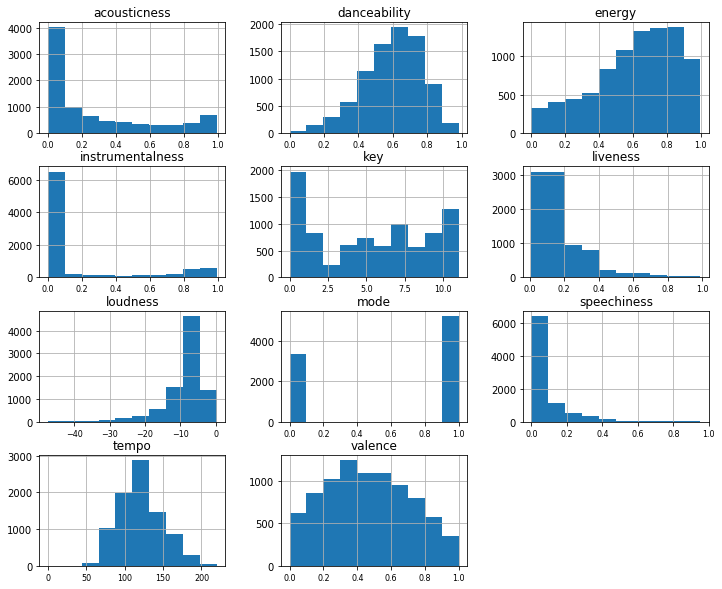

In [12]:
feature.hist(xlabelsize=8, figsize=(12,10))

## Create Clusters:

In [12]:
from sklearn.cluster import KMeans

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
audio_feature = scaler.fit_transform(feature)

In [16]:
pd.DataFrame(audio_feature)

0         1         2         3         4         5         6  \
0     0.919470 -0.128575 -0.351741  0.228564 -1.254077 -0.488920  0.137220   
1     0.802375 -0.002176 -0.351741  0.572494 -1.254077 -0.444831  0.046120   
2     1.147805 -1.001132  0.484210 -0.931655  0.797399 -0.562402 -0.154926   
3     1.042419  0.690977 -0.351741  0.759215 -1.254077 -0.530070  0.297429   
4     1.042419  0.690977 -0.351741  0.759215 -1.254077 -0.530070  0.297429   
...        ...       ...       ...       ...       ...       ...       ...   
8611 -0.918921  0.046752  0.484210 -0.927648 -1.254077 -0.453649  0.702664   
8612 -0.491525 -0.630091  1.320161 -1.011991  0.797399 -0.586896  1.170726   
8613 -0.719860 -1.930773 -1.466342 -2.120839 -1.254077 -0.509495  1.604233   
8614 -0.263190 -0.344676 -0.909041 -0.973918 -1.254077 -0.509495  0.407376   
8615 -0.901357  1.310737  1.041510  0.269733  0.797399 -0.540847 -0.645606   

             7         8         9        10  
0    -0.527161 -0.275505  1.249026  0.024317  
1    -0.526671 -0.433619  0.704932  0.021608  
2     2.122920 -0.407266 -0.253322 -0.878456  
3    -0.526759 -0.440207  1.074429  0.023866  
4    -0.526759 -0.440207  1.074429  0.023866  
...        ...       ...       ...       ...  
8611  1.686395 -0.268917  1.005402  0.485222  
8612 -0.276081 -0.532440  0.668389 -0.734790  
8613  1.937633 -0.354562 -1.471442 -0.266175  
8614 -0.375005 -0.301857  1.586039  0.321757  
8615 -0.518995 -0.387502  0.907952 -0.686057  

[8616 rows x 11 columns]

In [17]:
kmeans = KMeans()

In [18]:
kmeans.fit(audio_feature)

KMeans()

In [19]:
clusters = kmeans.predict(audio_feature)

len(clusters)

8616

In [20]:
pd.Series(clusters).value_counts()

4    1912
6    1819
7    1158
3    1116
2     773
5     703
0     672
1     463
dtype: int64

## Add clusters to playlist:

In [21]:
playlist["clusters"] = clusters

In [26]:
playlist.columns

Index(['song', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'clusters'],
      dtype='object')

In [23]:
playlist.to_csv("final_list.csv")

In [24]:
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [25]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
client_id = "5b1d2c1994a5431e8005aa884c463f4a",
client_secret = "cc7d916fce5749e2a548b3f88f8eb793"))